# Agentic RAG

[Retrieval Agents](https://python.langchain.com/docs/tutorials/qa_chat_history/#agents) are useful when we want to make decisions about whether to retrieve from an index.

To implement a retrieval agent, we simply need to give an LLM access to a retriever tool.

We can incorporate this into [LangGraph](https://langchain-ai.github.io/langgraph/).

## Setup

First, let's download the required packages and set our API keys:

In [1]:
%%capture --no-stderr
%pip install uv
%uv pip install chromadb==0.4.22
%uv pip install tiktoken==0.9.0
%uv pip install langchain==0.3.20
%uv pip install langchain-community==0.3.10
%uv pip install langchain-openai==0.3.1
%uv pip install langchainhub
%uv pip install langchain-text-splitters==0.3.6
%uv pip install langgraph==0.3.1
%uv pip install openai==1.65.3
%uv pip install PyMuPDF==1.25.3
%uv pip install pypdf==5.3.1
%uv pip install pillow==11.1.0
%uv pip install beautifulsoup4==4.13.3

Using Python 3.10.9 environment at: C:\Workbench\venv-langgraph-3.10
Audited 1 package in 23ms
Using Python 3.10.9 environment at: C:\Workbench\venv-langgraph-3.10
Audited 1 package in 11ms
Using Python 3.10.9 environment at: C:\Workbench\venv-langgraph-3.10
Audited 1 package in 14ms
Using Python 3.10.9 environment at: C:\Workbench\venv-langgraph-3.10
Audited 1 package in 17ms
Using Python 3.10.9 environment at: C:\Workbench\venv-langgraph-3.10
Audited 1 package in 14ms
Using Python 3.10.9 environment at: C:\Workbench\venv-langgraph-3.10
Audited 1 package in 11ms
Using Python 3.10.9 environment at: C:\Workbench\venv-langgraph-3.10
Audited 1 package in 14ms
Using Python 3.10.9 environment at: C:\Workbench\venv-langgraph-3.10
Audited 1 package in 14ms
Using Python 3.10.9 environment at: C:\Workbench\venv-langgraph-3.10
Audited 1 package in 12ms
Using Python 3.10.9 environment at: C:\Workbench\venv-langgraph-3.10
Audited 1 package in 10ms
Using Python 3.10.9 environment at: C:\Workbench\v

In [2]:
%pip show chromadb
%pip show langchain
%pip show langchain-openai
%pip show langchainhub
%pip show langgraph

Name: chromadb
Version: 0.4.22
Summary: Chroma.
Home-page: https://github.com/chroma-core/chroma
Author: 
Author-email: Jeff Huber <jeff@trychroma.com>, Anton Troynikov <anton@trychroma.com>
License: 
Location: c:\workbench\venv-langgraph-3.10\lib\site-packages
Requires: bcrypt, build, chroma-hnswlib, fastapi, grpcio, importlib-resources, kubernetes, mmh3, numpy, onnxruntime, opentelemetry-api, opentelemetry-exporter-otlp-proto-grpc, opentelemetry-instrumentation-fastapi, opentelemetry-sdk, overrides, posthog, pulsar-client, pydantic, pypika, PyYAML, requests, tenacity, tokenizers, tqdm, typer, typing-extensions, uvicorn
Required-by: langchain-chroma
Note: you may need to restart the kernel to use updated packages.
Name: langchain
Version: 0.3.20
Summary: Building applications with LLMs through composability
Home-page: 
Author: 
Author-email: 
License: MIT
Location: c:\workbench\venv-langgraph-3.10\lib\site-packages
Requires: async-timeout, langchain-core, langchain-text-splitters, lan

## Retriever

First, we index 3 Fidelity webpages.

In [1]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

urls = [
    
#    "https://fundresearch.fidelity.com/mutual-funds/summary/315792101",
#    "https://fundresearch.fidelity.com/mutual-funds/summary/315793596",
#    "https://fundresearch.fidelity.com/mutual-funds/summary/315793885",
    "https://www.fidelity.com/mutual-funds/why-fidelity-funds",
    "https://www.fidelity.com/mutual-funds/fidelity-funds/overview",
    "https://www.fidelity.com/viewpoints/retirement/how-much-do-i-need-to-retire",
]

docs = [WebBaseLoader(url).load() for url in urls]
docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=100, chunk_overlap=50
)
doc_splits = text_splitter.split_documents(docs_list)

# Add to vectorDB
vectorstore = Chroma.from_documents(
    documents=doc_splits,
    collection_name="rag-chroma",
    embedding=OpenAIEmbeddings(),
)
retriever = vectorstore.as_retriever()

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [2]:
print(docs_list)

[Document(metadata={'source': 'https://www.fidelity.com/mutual-funds/why-fidelity-funds', 'title': 'Why Fidelity Funds', 'language': 'en-US'}, page_content='\n\n\n\n\n\n\n\n\nWhy Fidelity Funds\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSkip to main content\n\n\n\n\n\n\n\n\n\n\nFidelity.com Home\n\n\n\nLog in\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nAccounts & Trade\n\n\n\n\n\n\nPortfolio \nAccount Positions \nTrade \nFidelity Trader+ Web \nFidelity Trader+\nTransfers\nCash Management \nBill Pay \nFull View® \nSecurity Settings \nAccount Features \nDocuments \nTax Forms & Information\nRetirement Distributions \nRefer a Friend\n\n\n\n\nRetirement\n\n\n\n\n\n\nRetirement Planning\n401(k) Rollovers & IRA Transfers\nRetirement Accounts\nRetirement Education\n\n\n\n\nPlanning & Advice\n\n\n\n\n\n\nWhat We Offer\nBuild Your Free Plan\nMy Goals  \nFinancial Basics\nBuilding Savings\nRobo Investing Plus Advice\nWealth Management\nFind an Advisor\nLife Ev

Then we create a retriever tool.

In [4]:
from langchain_core.tools import create_retriever_tool

retriever_tool = create_retriever_tool(
    retriever,
    "retrieve_fidelity_docs",
    """Search Fidelity Knowledge base in the vector store and return information for:
        - Calculating how much money a person needs to retire
        - Mutual Fund names
        - Types of funds""",
)

tools = [retriever_tool]

## Agent State
 
We will define a graph.

A `state` object that it passes around to each node.

Our state will be a list of `messages`.

Each node in our graph will append to it.

In [5]:
from typing import Annotated, Sequence
from typing_extensions import TypedDict

from langchain_core.messages import BaseMessage

from langgraph.graph.message import add_messages


class AgentState(TypedDict):
    # The add_messages function defines how an update should be processed
    # Default is to replace. add_messages says "append"
    messages: Annotated[Sequence[BaseMessage], add_messages]

## Nodes and Edges

We can lay out an agentic RAG graph like this:

* The state is a set of messages
* Each node will update (append to) state
* Conditional edges decide which node to visit next

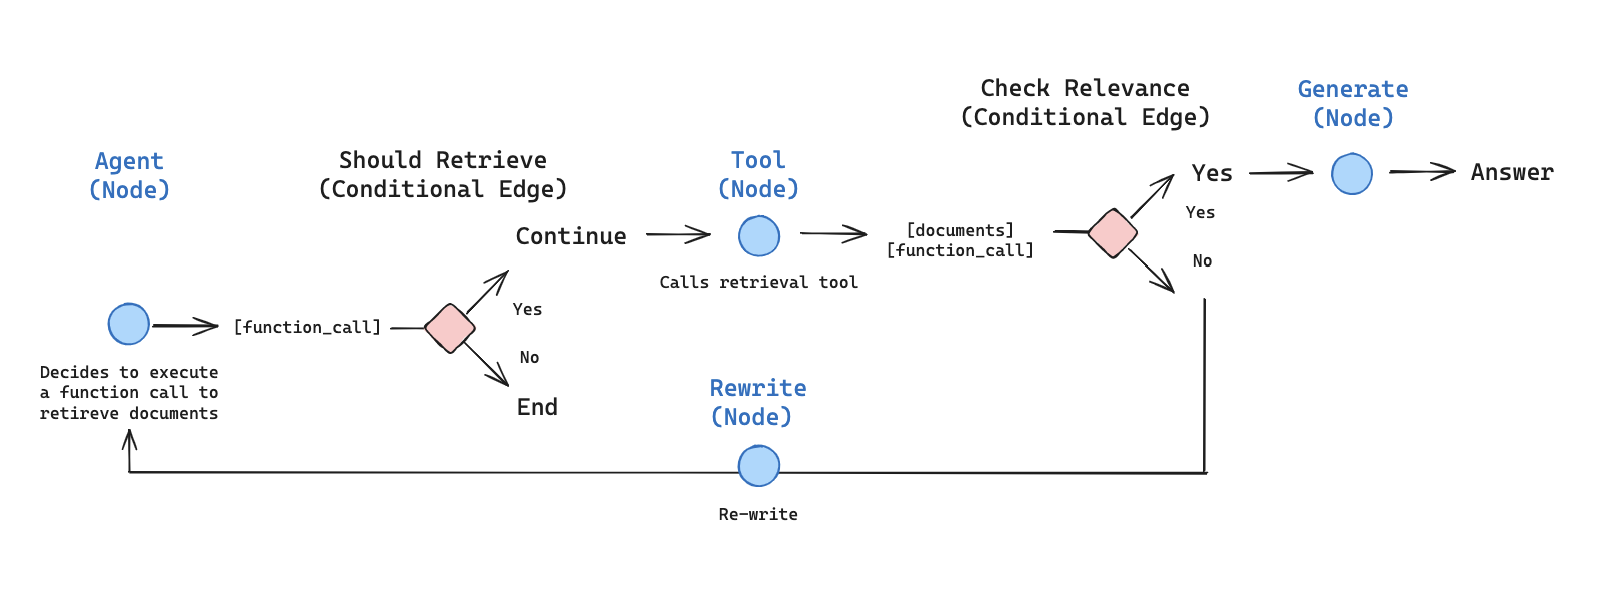

<div class="admonition note">
    <p class="admonition-title">Using Pydantic with LangChain</p>
    <p>
        This notebook uses Pydantic v2 <code>BaseModel</code>, which requires <code>langchain-core >= 0.3</code>. Using <code>langchain-core < 0.3</code> will result in errors due to mixing of Pydantic v1 and v2 <code>BaseModels</code>.
    </p>
</div>

In [10]:
from typing import Annotated, Literal, Sequence
from typing_extensions import TypedDict

from langsmith import Client
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI

from pydantic import BaseModel, Field

from langgraph.prebuilt import tools_condition

### Edges


def grade_documents(state) -> Literal["generate", "rewrite"]:
    """
    Determines whether the retrieved documents are relevant to the question.

    Args:
        state (messages): The current state

    Returns:
        str: A decision for whether the documents are relevant or not
    """

    print("---CHECK RELEVANCE---")

    # Data model
    class grade(BaseModel):
        """Binary score for relevance check."""

        binary_score: str = Field(description="Relevance score 'yes' or 'no'")

    # LLM
#    model = ChatOpenAI(temperature=0, model="gpt-4-0125-preview", streaming=True)
    model = ChatOpenAI(temperature=0, model="gpt-4o-mini", streaming=True)

    # LLM with tool and validation
    llm_with_tool = model.with_structured_output(grade)

    # Prompt
    prompt = PromptTemplate(
        template="""You are a financial advisor answering user question about retirement planning. \n
        Here is the retrieved document: \n\n {context} \n\n
        Here is the user question: {question} \n
        If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.""",
        input_variables=["context", "question"],
    )

    # Chain
    chain = prompt | llm_with_tool

    messages = state["messages"]
    last_message = messages[-1]

    question = messages[0].content
    docs = last_message.content

    scored_result = chain.invoke({"question": question, "context": docs})

    score = scored_result.binary_score

    if score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generate"

    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        print(score)
        return "rewrite"


### Nodes


def agent(state):
    """
    Invokes the agent model to generate a response based on the current state. Given
    the question, it will decide to retrieve using the retriever tool, or simply end.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with the agent response appended to messages
    """
    print("---CALL AGENT---")
    messages = state["messages"]
#    model = ChatOpenAI(temperature=0, streaming=True, model="gpt-4-turbo")
    model = ChatOpenAI(temperature=0, streaming=True, model="gpt-4o-mini")

    model = model.bind_tools(tools)
    response = model.invoke(messages)
    # We return a list, because this will get added to the existing list
    return {"messages": [response]}


def rewrite(state):
    """
    Transform the query to produce a better question.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with re-phrased question
    """

    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    question = messages[0].content

    msg = [
        HumanMessage(
            content=f""" \n 
    Look at the input and try to reason about the underlying semantic intent / meaning. \n 
    Here is the initial question:
    \n ------- \n
    {question} 
    \n ------- \n
    Formulate an improved question: """,
        )
    ]

    # Grader
    model = ChatOpenAI(temperature=0, model="gpt-4o-mini", streaming=True)
    
    response = model.invoke(msg)
    return {"messages": [response]}


def generate(state):
    """
    Generate answer

    Args:
        state (messages): The current state

    Returns:
         dict: The updated state with re-phrased question
    """
    print("---GENERATE---")
    messages = state["messages"]
    question = messages[0].content
    last_message = messages[-1]

    docs = last_message.content

    # Prompt
    prompt = Client().pull_prompt("rlm/rag-prompt")

    # LLM
    llm = ChatOpenAI(model_name="gpt-4o-mini", temperature=0, streaming=True)

    # Post-processing
    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)

    # Chain
    rag_chain = prompt | llm | StrOutputParser()

    # Run
    response = rag_chain.invoke({"context": docs, "question": question})
    return {"messages": [response]}


print("*" * 20 + "Prompt[rlm/rag-prompt]" + "*" * 20)
prompt = Client().pull_prompt("rlm/rag-prompt").pretty_print()  # Show what the prompt looks like

********************Prompt[rlm/rag-prompt]********************
================================ Human Message =================================

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: {question} 
Context: {context} 
Answer:


## Graph

* Start with an agent, `call_model`
* Agent make a decision to call a function
* If so, then `action` to call tool (retriever)
* Then call agent with the tool output added to messages (`state`)

In [11]:
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode

# Define a new graph
workflow = StateGraph(AgentState)

# Define the nodes we will cycle between
workflow.add_node("agent", agent)  # agent
retrieve = ToolNode([retriever_tool])
workflow.add_node("retrieve", retrieve)  # retrieval
workflow.add_node("rewrite", rewrite)  # Re-writing the question
workflow.add_node(
    "generate", generate
)  # Generating a response after we know the documents are relevant
# Call agent node to decide to retrieve or not
workflow.add_edge(START, "agent")

# Decide whether to retrieve
workflow.add_conditional_edges(
    "agent",
    # Assess agent decision
    tools_condition,
    {
        # Translate the condition outputs to nodes in our graph
        "tools": "retrieve",
        END: END,
    },
)

# Edges taken after the `action` node is called.
workflow.add_conditional_edges(
    "retrieve",
    # Assess agent decision
    grade_documents,
)
workflow.add_edge("generate", END)
workflow.add_edge("rewrite", "agent")

# Compile
graph = workflow.compile()

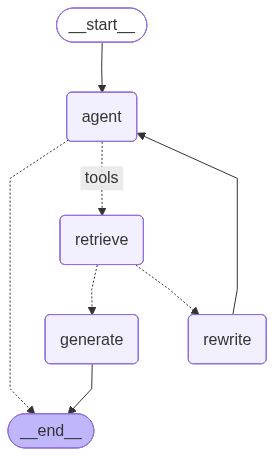

In [12]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [13]:
import pprint

inputs = {
    "messages": [
        ("system", """
            Instructions: 
                    - Check on the user question, query, or prompt content and if it is related to fidelity mutual fund, names of available mututal funds, or retirement 
                        use the tools to retrieve data from your knowledge base in the vector store. 
                    - Provide detailed answer for questions related to retirement or mutual funds based on the knowledge base in the vector store.
                    - For greeting type messaages, respond with message that you can help with questions related to Fidelity mutual funds and retirement planning,
                        otherwsie reply with the message: Sorry this is out of scope. You could use Google to search for this type of content/question"""),
        
        ("user", "What are the steps that I should take to determine how much I need to save for retirement planning"),
#        ("user", "what mutual funds good for cookies?"),
#        ("user", "what is the current weather conditions in Chicago today?"),
#        ("user", "Hello there"),
#        ("user", "why my laptop is overheating after 2 hours of usage?"),
#        ("user", "what are the names of mutual funds from Fidelity?"),
#        ("user", "what are the names of mutual funds from Schwab?"),

    ]
}
for output in graph.stream(inputs):
    for key, value in output.items():
        pprint.pprint(f"Output from node '{key}':")
        pprint.pprint("---")
        pprint.pprint(value, indent=2, width=80, depth=None)
    pprint.pprint("\n---\n")

---CALL AGENT---
"Output from node 'agent':"
'---'
{ 'messages': [ AIMessage(content='', additional_kwargs={}, response_metadata={'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_6b23b3aa8a', 'service_tier': 'default', 'model_provider': 'openai'}, id='lc_run--019c23bb-e9c9-7b01-a31b-34dc9830df7b', tool_calls=[{'name': 'retrieve_fidelity_docs', 'args': {'query': 'how much money a person needs to retire'}, 'id': 'call_OosfKe8e31o3EarcZOr5b0hn', 'type': 'tool_call'}], usage_metadata={'input_tokens': 239, 'output_tokens': 23, 'total_tokens': 262, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}
'\n---\n'
---CHECK RELEVANCE---
---DECISION: DOCS RELEVANT---
"Output from node 'retrieve':"
'---'
{ 'messages': [ ToolMessage(content="Consider some hypothetical examples (see graphic). Max plans to delay retirement until age 70, so he will need to have saved 8x his final income to sustain 

_____________________________________________________________________________________

# PyPDF

_____________________________________________________________________________________

In [11]:
%pip show pypdf

Name: pypdf
Version: 5.3.1
Summary: A pure-python PDF library capable of splitting, merging, cropping, and transforming PDF files
Home-page: 
Author: 
Author-email: Mathieu Fenniak <biziqe@mathieu.fenniak.net>
License: 
Location: c:\workbench\venv-langgraph-3.10\lib\site-packages
Requires: typing_extensions
Required-by: llama-index-readers-file
Note: you may need to restart the kernel to use updated packages.


In [14]:
from langchain_community.document_loaders import PyPDFLoader

# Use the full absolute path
file_path = "./FFFGX.pdf"

# Load the PDF
loader = PyPDFLoader(file_path)

# Store pages
pages = []
async for page in loader.alazy_load():
    pages.append(page)

print(f"Loaded {len(pages)} pages successfully!")

Loaded 6 pages successfully!


In [15]:
print(f"{pages[1].metadata}\n")
print(pages[3].page_content)

{'producer': '', 'creator': 'Quadient~Inspire~16.0.716.7', 'creationdate': '2024-12-21T04:30:27+00:00', 'title': 'MFL_Doc', 'source': './FFFGX.pdf', 'total_pages': 6, 'page': 1, 'page_label': '2'}

Allocation
Glossary Of Terms
Beta: A measure of a portfolio's sensitivity to market movements (as represented by a benchmark index). The benchmark index has a beta of 1.0. A beta of 
more (less) than 1.0 indicates that a fund's historical returns have fluctuated more (less) than the benchmark index. Beta is a more reliable measure of 
volatility when used in combination with a high R2 which indicates a high correlation between the movements in a fund's returns and movements in a 
benchmark index.
Distribution and/or service fee(12b-1) Fees: The 12b-1 fee represents the maximum annual charge deducted from fund assets to pay for distribution and 
marketing costs. Total 12b-1 fees, excluding loads, are capped at 1.00% of average net assets annually. Of this, the distribution and marketing porti

In [16]:
from langchain_core.vectorstores import InMemoryVectorStore
from langchain_openai import OpenAIEmbeddings

vector_store = InMemoryVectorStore.from_documents(pages, OpenAIEmbeddings())
docs = vector_store.similarity_search("What is the fund manager?", k=2)
for doc in docs:
    print(f'Page {doc.metadata["page"]}: {doc.page_content[:1000]}\n')

Page 2: Allocation
Fund Overview (continued)
Additional Disclosures
This description is only intended to provide a brief overview of the mutual fund. Read the fund's 
prospectus for more detailed information about the fund.
Page 3 of 6

Page 3: Allocation
Glossary Of Terms
Beta: A measure of a portfolio's sensitivity to market movements (as represented by a benchmark index). The benchmark index has a beta of 1.0. A beta of 
more (less) than 1.0 indicates that a fund's historical returns have fluctuated more (less) than the benchmark index. Beta is a more reliable measure of 
volatility when used in combination with a high R2 which indicates a high correlation between the movements in a fund's returns and movements in a 
benchmark index.
Distribution and/or service fee(12b-1) Fees: The 12b-1 fee represents the maximum annual charge deducted from fund assets to pay for distribution and 
marketing costs. Total 12b-1 fees, excluding loads, are capped at 1.00% of average net assets annually

In [15]:
%pip show PyMuPDF pillow langchain-openai 

Name: PyMuPDF
Version: 1.25.3
Summary: A high performance Python library for data extraction, analysis, conversion & manipulation of PDF (and other) documents.
Home-page: 
Author: Artifex
Author-email: support@artifex.com
License: Dual Licensed - GNU AFFERO GPL 3.0 or Artifex Commercial License
Location: c:\workbench\venv-langgraph-3.10\lib\site-packages
Requires: 
Required-by: 
---
Name: pillow
Version: 11.1.0
Summary: Python Imaging Library (Fork)
Home-page: https://python-pillow.github.io
Author: 
Author-email: "Jeffrey A. Clark" <aclark@aclark.net>
License: MIT-CMU
Location: c:\workbench\venv-langgraph-3.10\lib\site-packages
Requires: 
Required-by: llama-index-core, matplotlib, sentence-transformers
---
Name: langchain-openai
Version: 0.3.1
Summary: An integration package connecting OpenAI and LangChain
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: c:\workbench\venv-langgraph-3.10\lib\site-packages
Requires: langchain-core, open

In [19]:
import base64
import io

import fitz
from PIL import Image


def pdf_page_to_base64(pdf_path: str, page_number: int):
    pdf_document = fitz.open(pdf_path)
    page = pdf_document.load_page(page_number - 1)  # input is one-indexed
    pix = page.get_pixmap()
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

    buffer = io.BytesIO()
    img.save(buffer, format="PNG")

    return base64.b64encode(buffer.getvalue()).decode("utf-8")

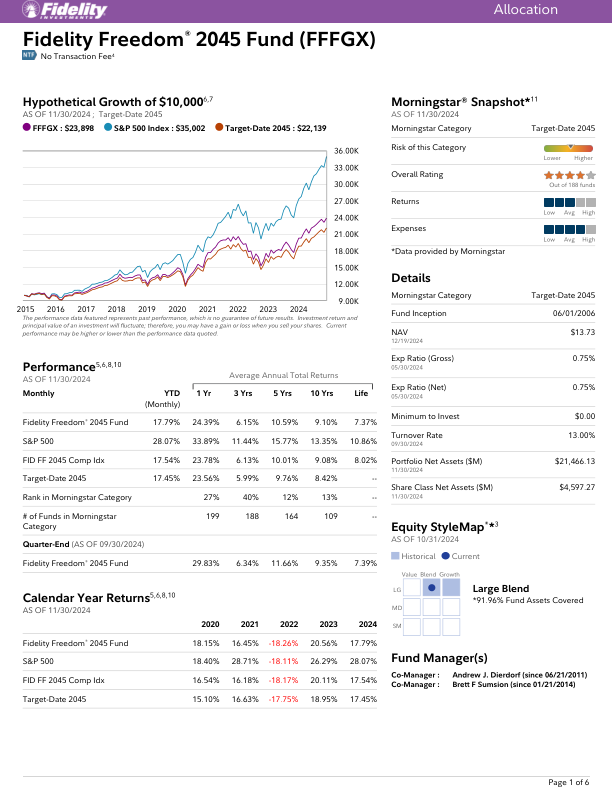

In [20]:
from IPython.display import Image as IPImage
from IPython.display import display

file_path="./FFFGX.pdf"

base64_image = pdf_page_to_base64(file_path,1)
display(IPImage(data=base64.b64decode(base64_image)))

In [21]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini")

In [22]:
from langchain_core.messages import HumanMessage

query = "What is the name of this fund?"

message = HumanMessage(
    content=[
        {"type": "text", "text": query},
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"},
        },
    ],
)
response = llm.invoke([message])
print(response.content)

The name of the fund is **Fidelity Freedom® 2045 Fund (FFFGX)**.


In [23]:
query = "Who is the fund manager?"

message = HumanMessage(
    content=[
        {"type": "text", "text": query},
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"},
        },
    ],
)
response = llm.invoke([message])
print(response.content)

The fund managers for the Fidelity Freedom® 2045 Fund (FFFGX) are:

- Co-Manager: Andrew J. Dierdorff (since 06/21/2011)
- Co-Manager: Brett F. Sumsion (since 01/12/2014)


In [24]:
query = "What is the calendar year return for 2022 for this fund and S&P 500"

message = HumanMessage(
    content=[
        {"type": "text", "text": query},
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"},
        },
    ],
)
response = llm.invoke([message])
print(response.content)

For the calendar year 2022:

- **Fidelity Freedom 2045 Fund (FFFGX)**: -18.26%
- **S&P 500**: -18.11%

These figures represent the annual returns for each fund during that year.


In [25]:
query = "What is the Portfolio Net Assets"

message = HumanMessage(
    content=[
        {"type": "text", "text": query},
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"},
        },
    ],
)
response = llm.invoke([message])
print(response.content)

The Portfolio Net Assets for the Fidelity Freedom® 2045 Fund (FFFGX) as of 11/30/2024 is $21,461,363,130.


In [26]:
query = "What is the Morningstar rating for this fund? How many funds used to rate this fund?"

message = HumanMessage(
    content=[
        {"type": "text", "text": query},
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"},
        },
    ],
)
response = llm.invoke([message])
print(response.content)

The Morningstar rating for the Fidelity Freedom® 2045 Fund (FFFGX) is **4 stars** as of 11/30/2024. This fund is rated within the **Target-Date 2045** category, which has a total of **199 funds** used to rate this fund.
